# Module 7: Machine Learning

## Author Jason A. Ballard  

## [JBtallgrass GitHub Repo](https://github.com/JBtallgrass/datafun-07-ml)

In [121]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score 

## Part 1: Chart a straight line

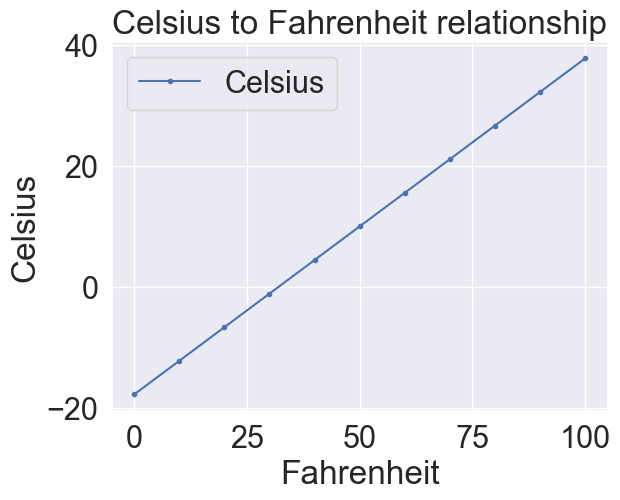

In [122]:
c =lambda f: 5/9 *(f-32)

temps =[(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit' , 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y = 'Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Save the figure
plt.title(f'Celsius to Fahrenheit relationship')
plt.savefig('figures/temp_line_chart.png')  # Saves to the file as .png to figures directory
# Show all plots
plt.show()


## Part 2: Predict Avg High Temp in NYC in January

### Section 1: Data Acquisition

In [123]:
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2: Data Inspection

In [124]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [125]:
nyc_df.columns =['Date', 'Temperature', 'Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [126]:
nyc_df.Date.dtype

dtype('int64')

In [127]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

In [128]:
pd.set_option('display.precision',2)

nyc_df.Temperature.describe()



count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build the Model

In [129]:
linear_regression =stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope


0.01477136113296616

In [130]:
linear_regression.intercept

8.694993233674293

### Section 6: Predict

In [131]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7: Data Visualization

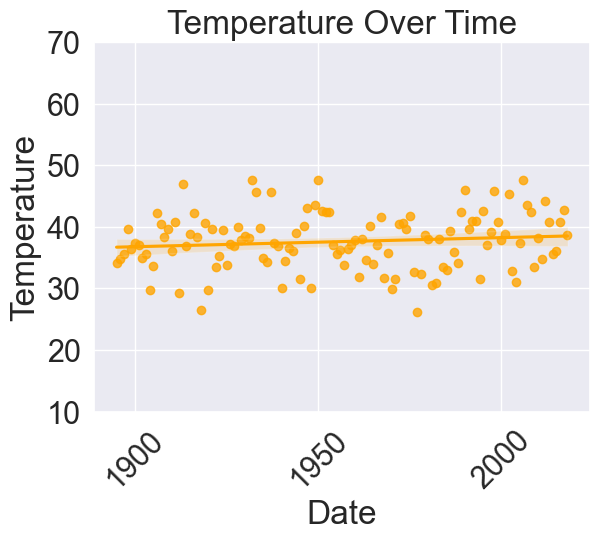

In [132]:
# Set the style to 'darkgrid'
sns.set_style('darkgrid')

# Create the regression plot
axes = sns.regplot(x='Date', y='Temperature', data=nyc_df, color='orange')
axes.set_ylim(10, 70)

# Add title and labels for clarity
axes.set_title('Temperature Over Time')
axes.set_xlabel('Date')
axes.set_ylabel('Temperature')

# Optionally, if you have a lot of dates on the x-axis and they overlap
plt.xticks(rotation=45)

# Save the figure
plt.savefig('figures/regression_plot.png', dpi=300)  # Adjust dpi for higher resolution if needed

# Display the plot
plt.show()

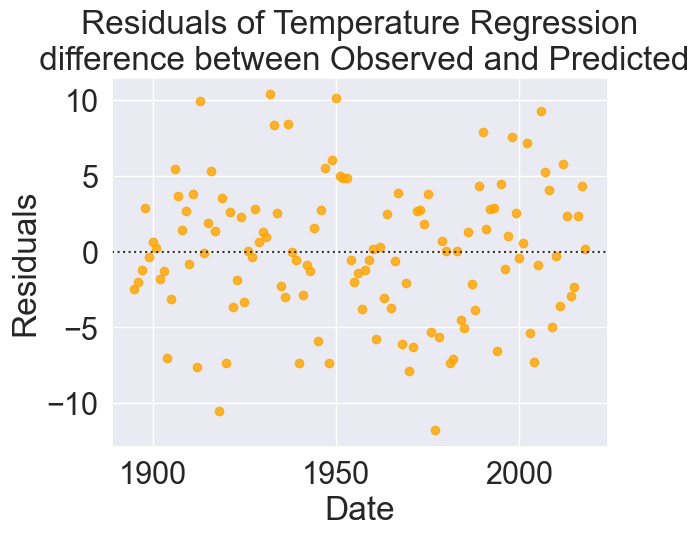

In [133]:
# Create a residual plot to show differences between observed and predicted temperatures
sns.residplot(x='Date',
            y='Temperature',
            data=nyc_df,
            color='orange'
            )

plt.title('Residuals of Temperature Regression\n difference between Observed and Predicted')
plt.xlabel('Date')
plt.ylabel('Residuals')

# Save the residual plot
plt.savefig('figures/temperature_residuals.png', dpi=300)

plt.show()


## Part 3: Predict the Average High Temperature in January in NYC

### Section 1: Build the Model (Split training and testing)

In [134]:
X_train, X_test, y_train, y_test =train_test_split(nyc_df.Date.values.reshape(-1,1),nyc_df.Temperature.values, random_state=11)

X_train.shape

(93, 1)

In [135]:
X_test.shape

(31, 1)

In [136]:
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [137]:
linear_regression.coef_

array([0.01939167])

In [138]:
linear_regression.intercept_

-0.30779820252656975

### Section 2: Test the Model

In [139]:
predicted = linear_regression.predict(X_test)

expected = y_test 

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3: Predict 

In [140]:
predict = (lambda x: linear_regression.coef_* x + linear_regression.intercept_)

predict (2024)

array([38.94094855])

### Section 4: Data Visualizations

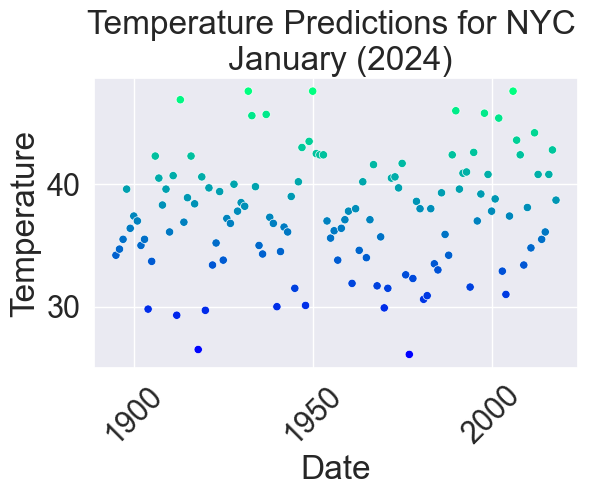

In [141]:
axes = sns.scatterplot(data=nyc_df,
                        x = 'Date', 
                        y = 'Temperature',
                        hue='Temperature',
                        palette='winter',
                        legend=False
                        )

# Adjust for better layout if necessary, especially if you have date overlaps
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Temperature Predictions for NYC \n January (2024)')

# Save the figure
plt.savefig('figures/nyc_temperature_scatterplot.png', dpi=300)  # Saves the plot as a PNG file with 300 DPI

# Show the plot
plt.show()


## Part 4:  Analysis

### Key Takeaways from the Module 7 project

1. **Gradual Warming Trend with Profound Implications:** The slight upward trend in temperatures over the 124-year period not only confirms the reality of global warming but also signals long-term environmental, ecological, and social implications. This underscores the urgency of acknowledging and addressing the subtle yet significant shifts in climate patterns.

2. **Challenges in Climate Forecasting:** The discrepancies between predictions made by linear regression models and actual observed temperatures highlight the inherent difficulties in accurately modeling and forecasting climate phenomena. This points to the complexity of the climate system and the limitations of current predictive tools in capturing this complexity.

3. **Need for Advanced Predictive Models:** The analysis consistently stresses the importance of methodological advancements and the development of more sophisticated models for climate prediction. Such advancements are critical for improving the accuracy of climate projections, enabling better preparedness and response strategies for climate change mitigation and adaptation.

### Model comparison

1. I couldn't tell a differnce other than the amount of typing (Anti cut pasta) in a programming class due counting reps.
2. The machine-learning in python (chapter 15) presented tighter predctions that may have better confidence intervals.
3. I am not an expert and therefore I am excited to continue learning.
4. I am amzed at the amount of variation you can play with in the programming and DataViz applications.


## Part 5 Bonus
"California Housing Dataset"

### Section 1: Fetch Data

In [142]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

### Section 2: Display Dataset Description

In [143]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [144]:
california.data.shape

(20640, 8)

In [145]:
california.target.shape

(20640,)

In [146]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Section 3: Explore the Dataset

In [147]:
pd.set_option('display.precision', 4)

pd.set_option('display.max_columns', 9)

pd.set_option('display.width', None)

In [148]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

california_df['MedHouseValue'] = pd.Series(california.target)

In [149]:
california_df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [150]:
california_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09,0.781
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21,0.771
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22,0.923
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32,0.847
20639,2.3886,16.0,5.2547,1.1623,1387.0,2.6170,39.37,-121.24,0.894


In [151]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Section 4: Data Visualization

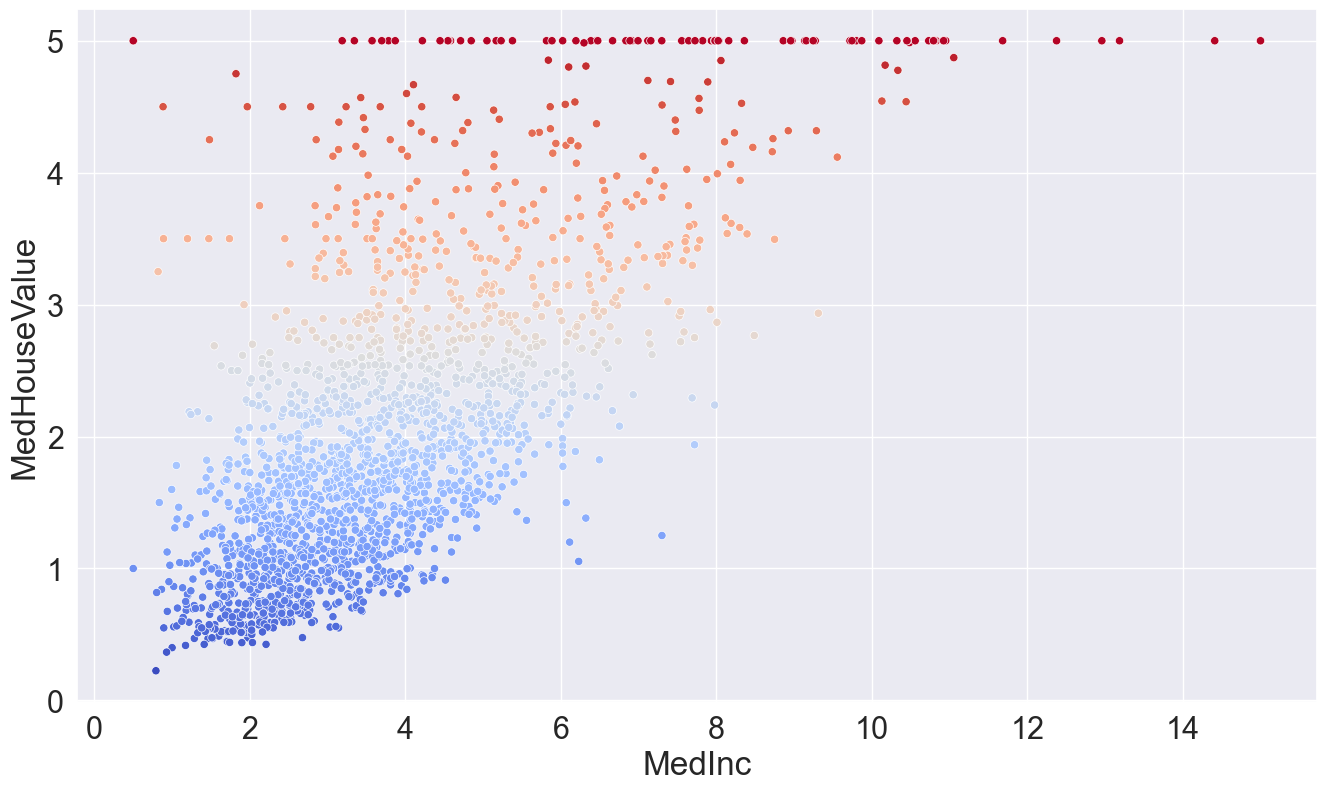

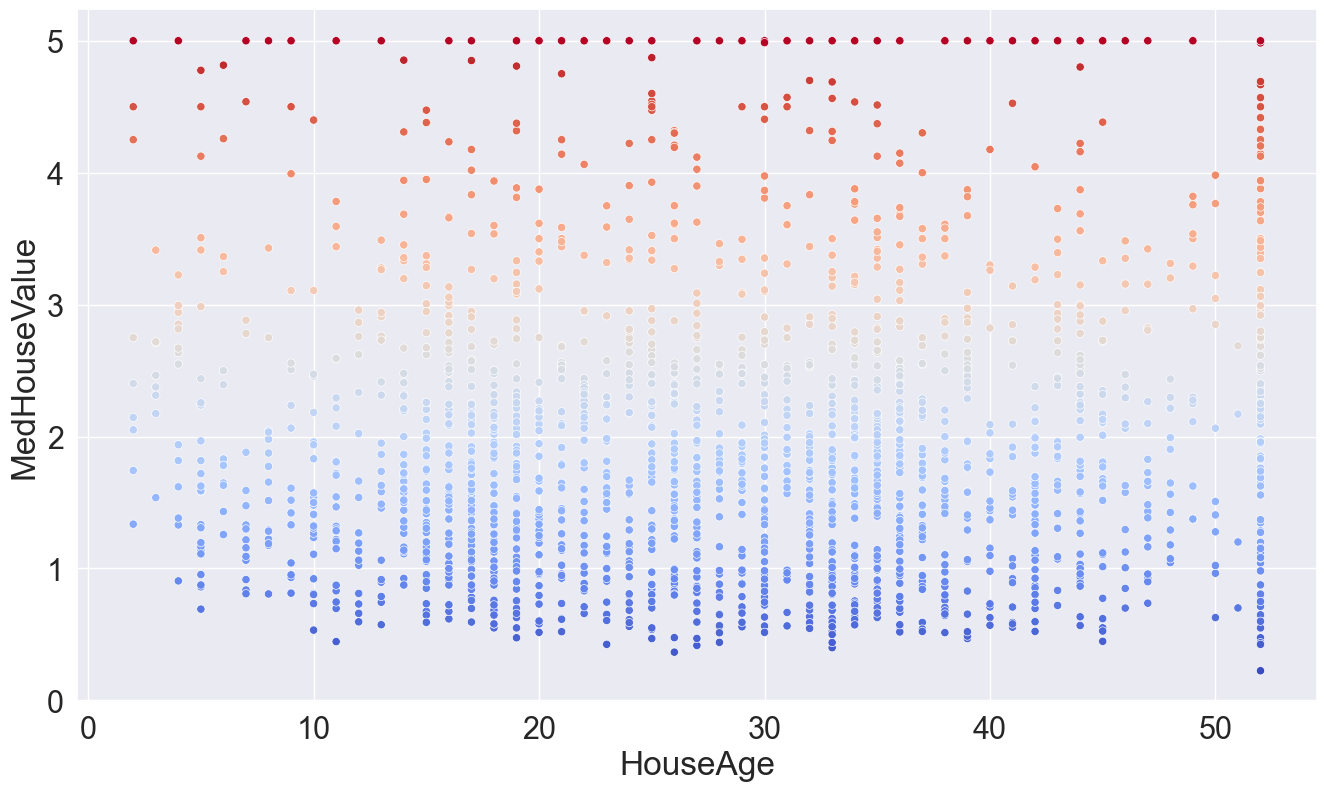

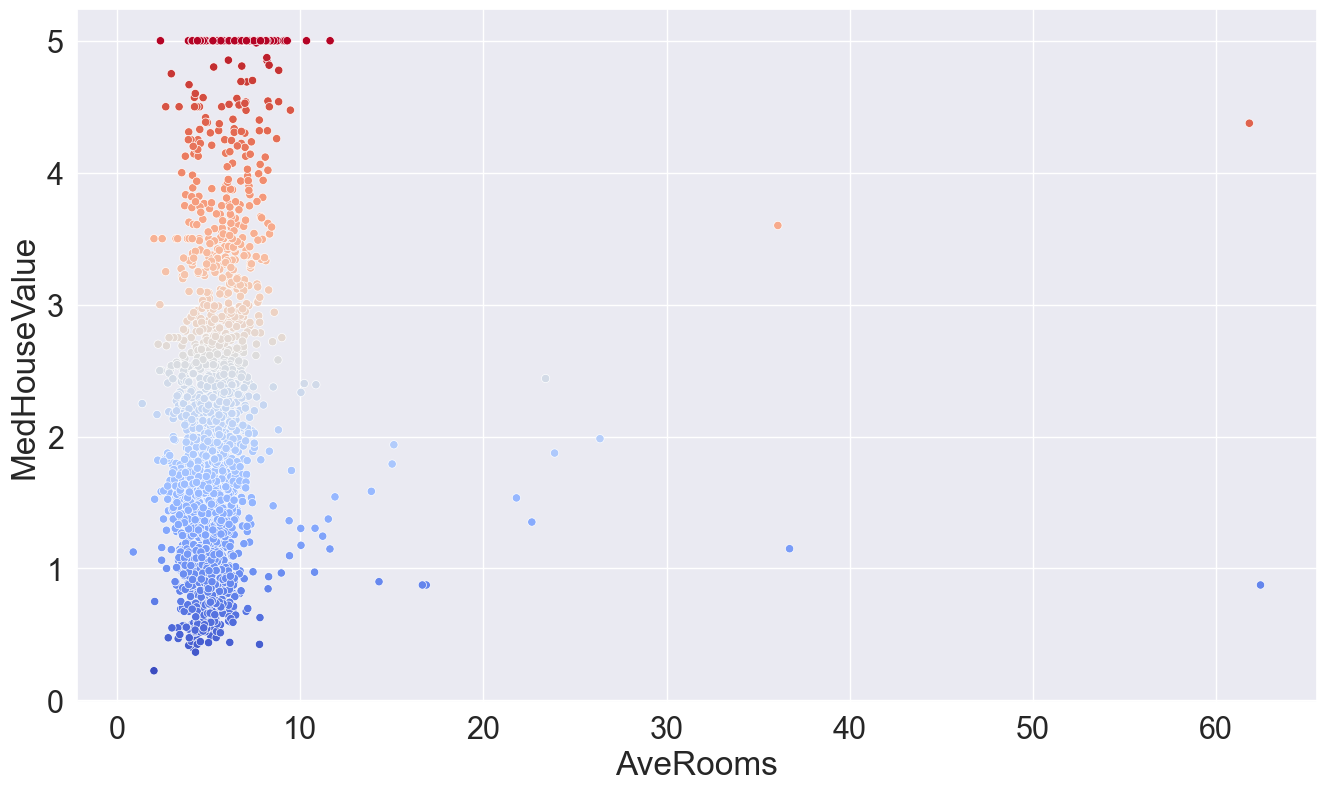

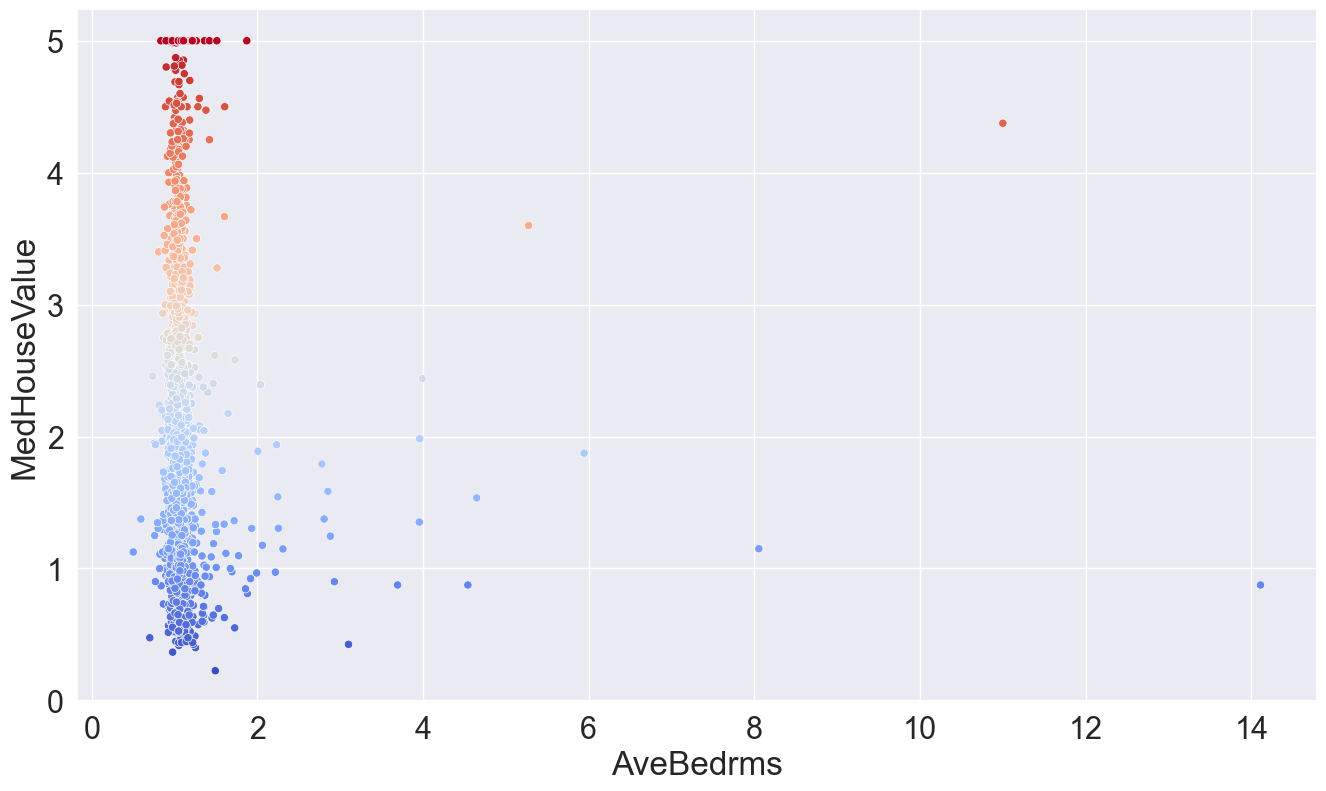

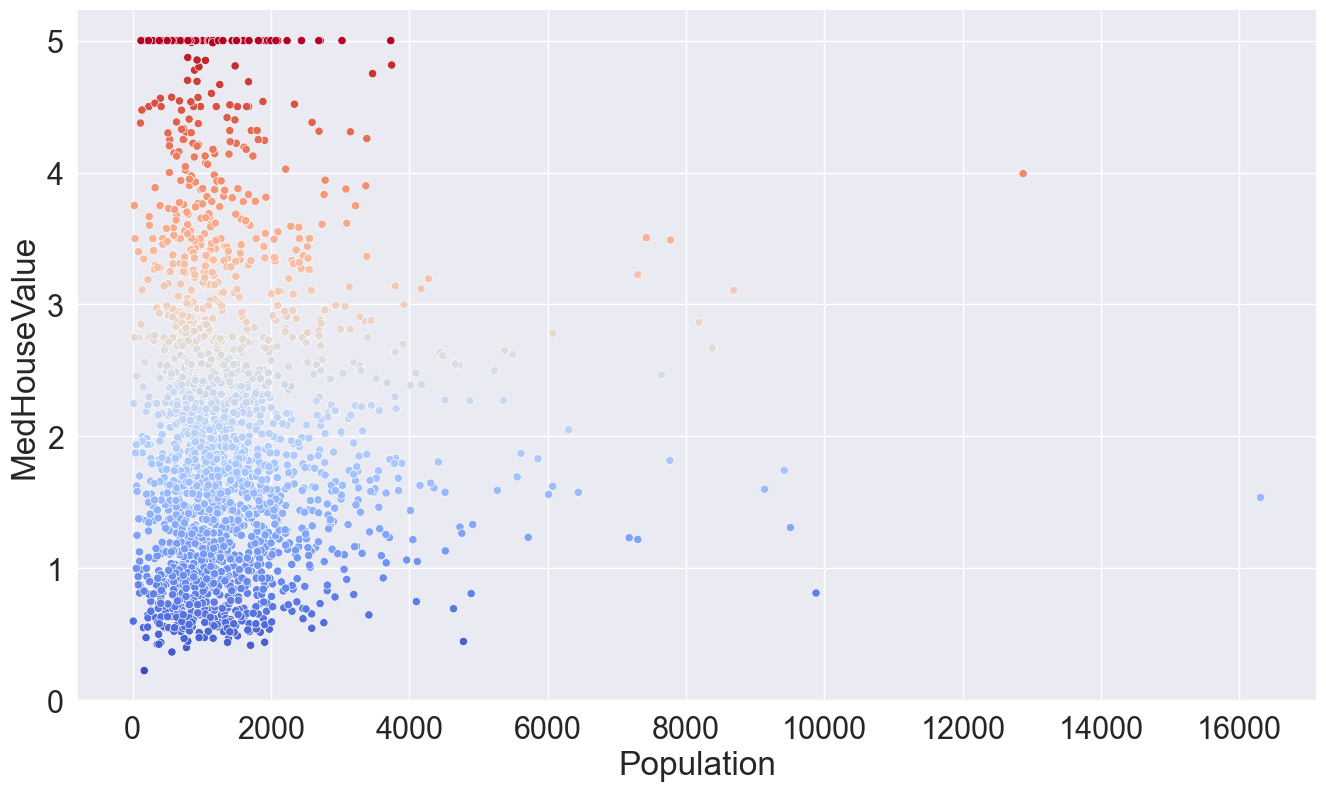

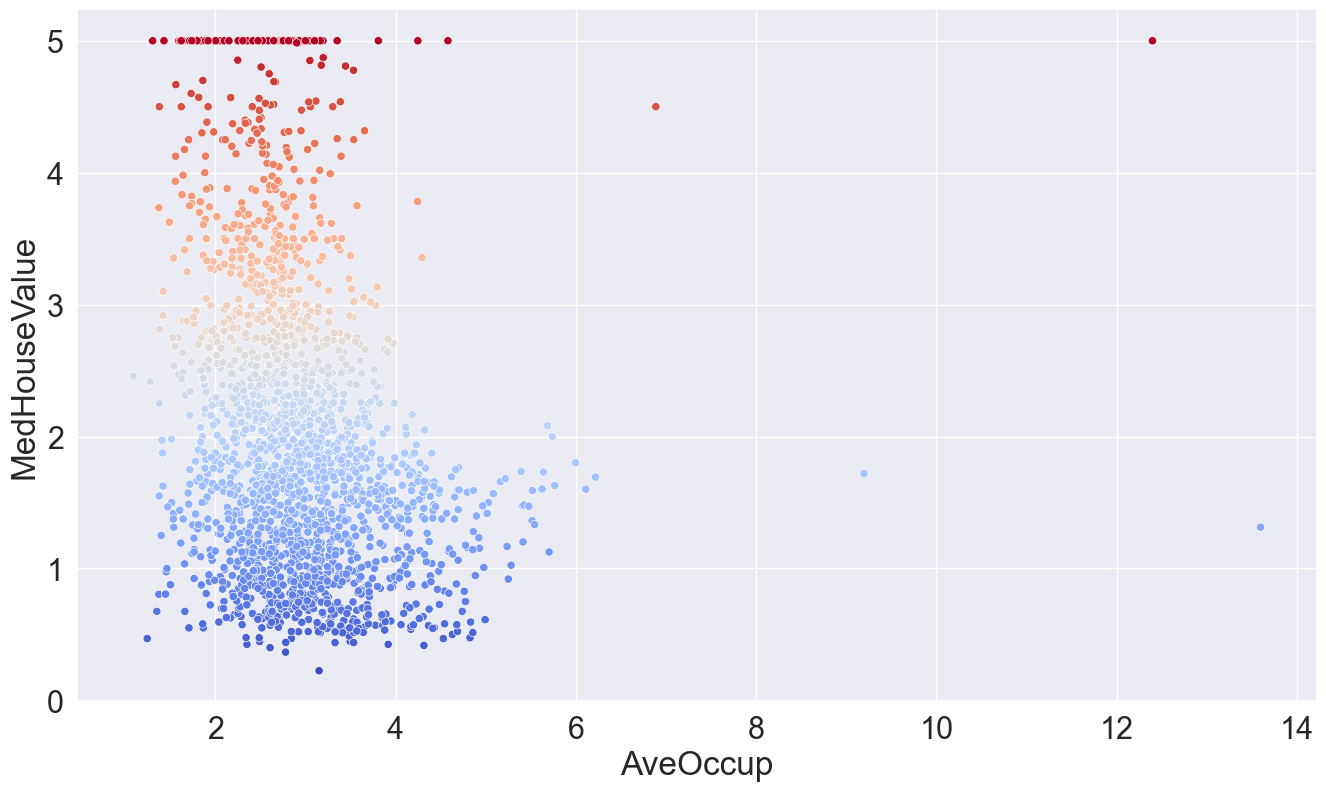

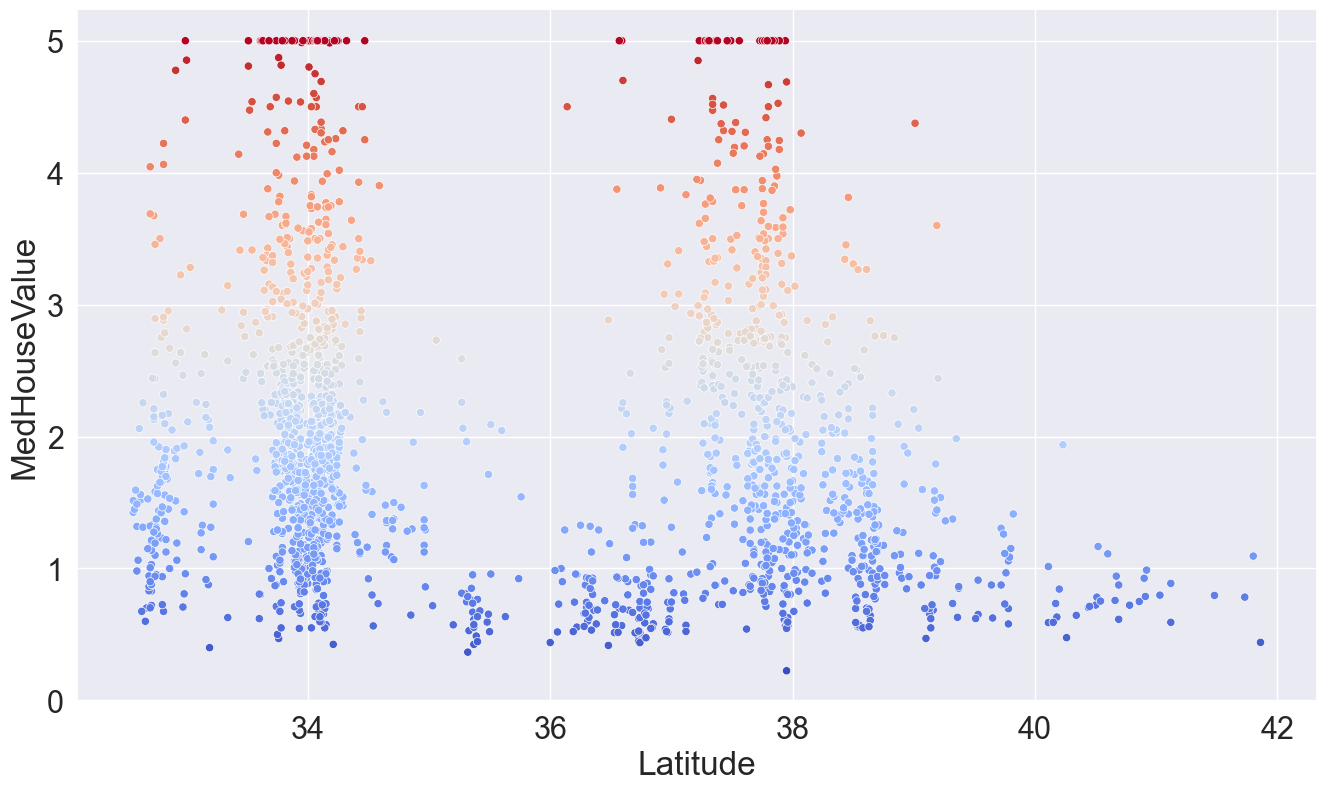

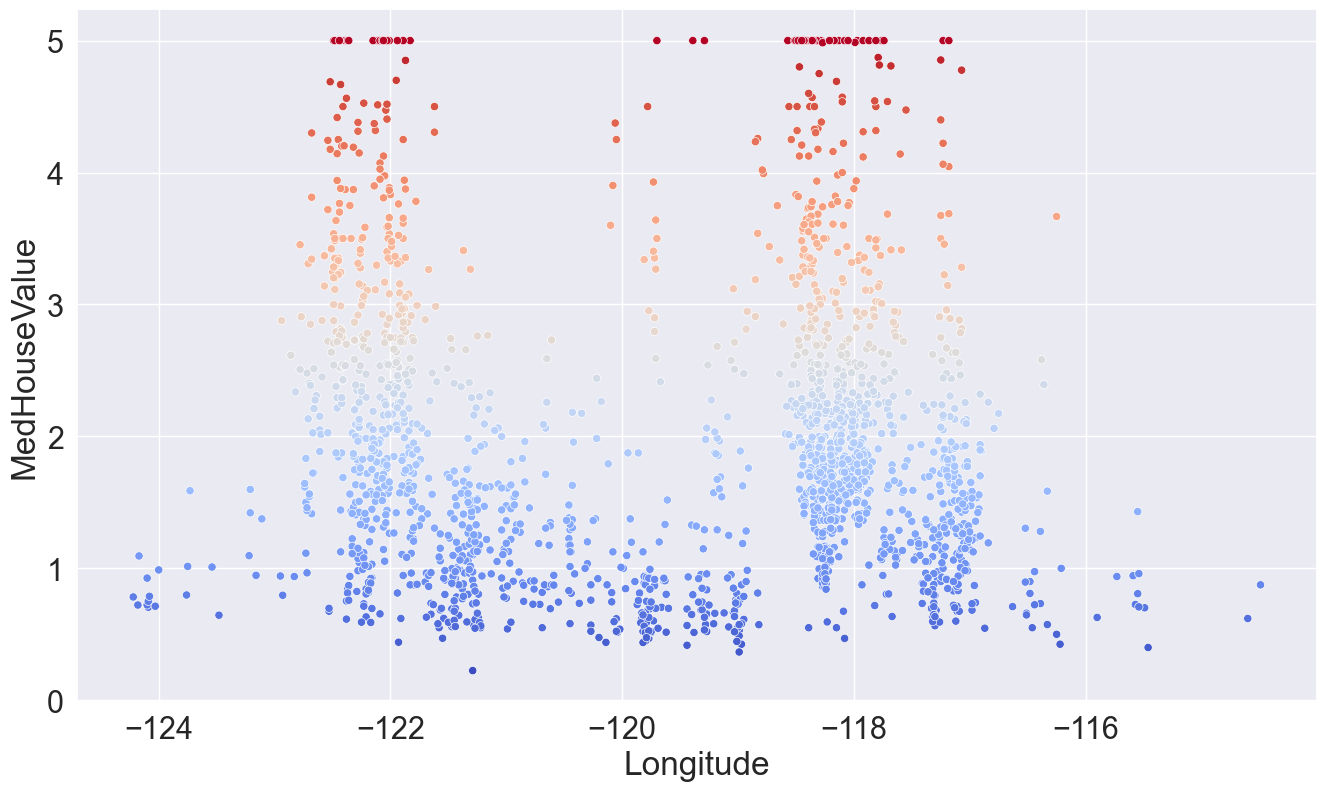

In [152]:
# california_df is already loaded
sample_df = california_df.sample(frac=0.1, random_state=17)

sns.set(font_scale=2)
sns.set_style('darkgrid')

# california.feature_names contains the names of the features to plot
for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(
        data=sample_df,
        x=feature,
        y='MedHouseValue',
        hue='MedHouseValue',
        palette='coolwarm',  # desired color palette
        legend=False
    )
    
    # Save each figure with a unique name based on the feature
    plt.savefig(f'figures/{feature}_vs_MedHouseValue.png', dpi=300)
    
    # Show the plot
    plt.show()
    
    # Close the figure after displaying and saving to free up memory
    plt.close()


### Section 5: Build the Model

In [153]:
X_train, X_test, y_train, y_test =train_test_split(california.data, california.target, random_state=11)

X_train.shape

(15480, 8)

In [154]:
X_test.shape

(5160, 8)

### Section 6a: Train the Model

In [155]:
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [156]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}:{linear_regression.coef_[i]}')    

    MedInc:0.4377030215382204
  HouseAge:0.009216834565798165
  AveRooms:-0.10732526637360909
 AveBedrms:0.6117133073918076
Population:-5.756822009296558e-06
  AveOccup:-0.0033845664657163824
  Latitude:-0.4194818609649073
 Longitude:-0.4337713349874012


In [157]:
linear_regression.intercept_

-36.882950656055435

### Section 6b: Testing the Model

In [158]:
predicted = linear_regression.predict(X_test)

expected = y_test

predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [159]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Section 7: Comparison of Prediction Vs. Expected Prices

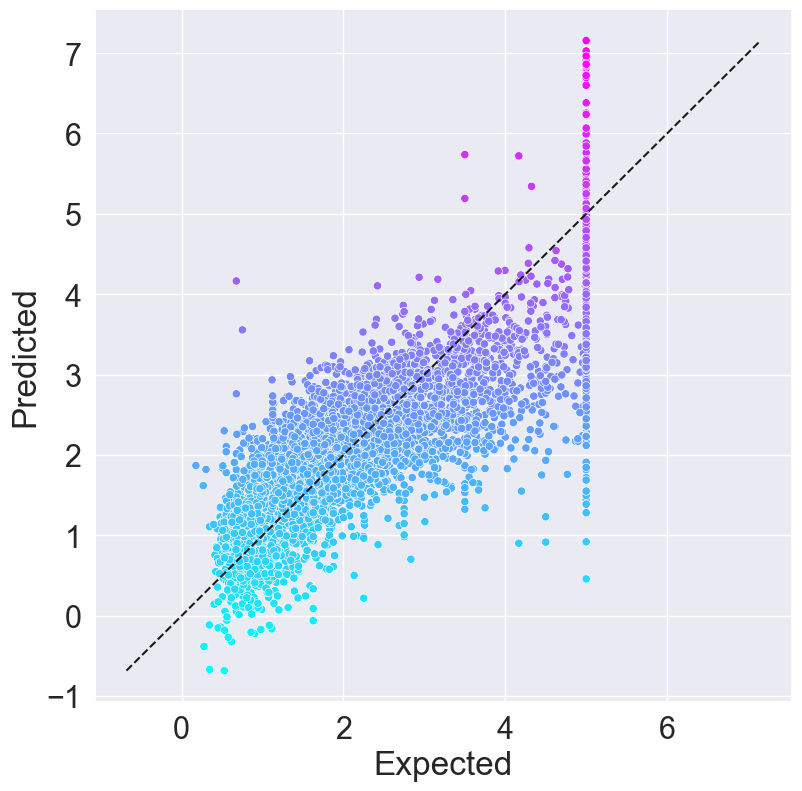

In [160]:
df = pd.DataFrame()

df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

plt.figure(figsize=(9, 9))
sns.scatterplot(
        data=df,
        x='Expected',
        y='Predicted',
        hue='Predicted',
        palette='cool',  # desired color palette
        legend=False
)

start = min (expected.min(), predicted.min())

end = max (expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

### Section 8: Regression Metrics

In [161]:
metrics.r2_score(expected, predicted)


0.6008983115964333

In [162]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449117

### Section 9: Choosing the Best Model

In [163]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet' : ElasticNet(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
}

In [164]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores =cross_val_score(estimator=estimator_object, 
        X=california.data, 
        y=california.target, 
        cv=kfold, 
        scoring='r2'
        )
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')
    
  

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
